# Relação entre Taxa Real de Juros Americana e PIB Mundial

In [2]:
#Importando Pacotes:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import geopandas as gpd
import altair as alt
import os as os
#Importando Módulos:
from freedom import freedom
from data import data
from analyze import analyze
#Importando Mais Limpeza de dados:
import clean_data

In [7]:
#Obtendo os dados de PIB Mundial por país:
gdp = analyze(data,"GDP per capita (current US$)")[[str(num) for num in range(1994,2018)]]
cols = []
for i in range(1994,2018):
    cols.append(str(i))
gdp = gdp[cols].dropna()
gdp

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Albania,619.065163,760.559376,1046.358511,749.584649,865.302162,1098.425463,1175.788981,1326.970339,1453.642777,1890.681557,...,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3952.830781,4131.872341,4537.862492
Algeria,1499.971505,1444.908036,1596.029867,1612.009303,1588.481449,1581.004564,1757.017797,1732.857979,1774.033673,2094.335506,...,4905.254866,3868.831230,4463.394675,5432.413320,5565.134521,5471.123389,5466.425778,4160.220067,3916.881571,4123.389937
Andorra,16234.809010,18461.064858,19017.174590,18353.059722,18894.521496,19261.710504,21936.530101,22228.846493,24741.493570,32776.442270,...,47785.659086,43339.379875,39736.354063,41098.766942,38391.080867,40619.711298,42294.994727,36038.267604,37231.815671,39146.548836
Angola,320.657792,388.166766,512.620966,506.884952,419.639845,385.768853,555.296942,526.168743,711.181789,779.468317,...,3868.579014,3347.844900,3531.416878,4299.008136,4539.467689,4804.633826,4707.578098,3683.552607,3308.772828,4170.312280
Antigua and Barbuda,8218.597479,7841.464034,8379.576739,8755.156499,9115.234532,9363.186640,9932.029788,9414.160613,9443.063702,9801.967066,...,14797.368423,13082.281660,12174.697859,11931.204107,12517.557929,12194.608761,12946.986936,13659.147914,14462.176279,15021.738183
Argentina,7449.480390,7373.428246,7683.574065,8172.664323,8248.761989,7736.369623,7669.273916,7170.694674,2579.193168,3330.437006,...,8953.359275,8161.306966,10276.260498,12726.908359,12969.707124,12976.636425,12245.256449,13698.293438,12654.354999,14401.974855
Armenia,400.516092,456.375900,504.059514,523.283569,609.173025,597.433482,622.742748,694.430512,783.261610,930.166157,...,4010.026997,2993.832531,3218.381655,3526.978143,3684.804810,3843.591213,3994.712355,3617.935746,3605.743117,3936.798320
Australia,18045.439060,20319.630628,21861.325510,23468.596831,21318.964169,20521.777571,21669.410913,19482.567903,20074.229313,23437.312145,...,49535.257874,42709.803303,51936.888712,62411.785447,67864.689862,67990.290030,62327.555939,56561.412382,49896.681101,53799.938090
Austria,25646.700659,30325.849582,29809.076773,26705.478599,27361.875111,27174.297156,24564.458295,24537.514263,26401.745456,32222.897241,...,51708.765754,47963.179402,46858.043273,51374.958407,48567.695286,50716.708706,51704.541188,44206.784282,44731.010855,47290.911650


In [8]:
#Obtendo os dados agregados para o mundo todo:
gdp_world = gdp.sum().to_frame()
gdp_world.reset_index(level=0, inplace=True)
gdp_world.columns=['Year','Gdp_World']
gdp_world

,Year,Gdp_World
0,1994,9.700013e+05
1,1995,1.093246e+06
2,1996,1.125063e+06
3,1997,1.114146e+06
4,1998,1.100332e+06
5,1999,1.128013e+06
6,2000,1.146803e+06
7,2001,1.130445e+06
8,2002,1.190231e+06
9,2003,1.376232e+06


In [9]:
#Obtendo dados da taxa real de Juros Americana:
real_rate = analyze(data,"c-United States",['Real interest rate (%)'])
real_rate.reset_index(level=0, inplace=True)
real_rate.columns=['Year','Real_rate_us']
real_rate

,Year,Real_rate_us
0,1963,3.37488
1,1964,2.95167
2,1965,2.56591
3,1966,2.64942
4,1967,2.40623
5,1968,1.86391
6,1969,2.85177
7,1970,5.57526
8,1971,0.614434
9,1972,0.880974


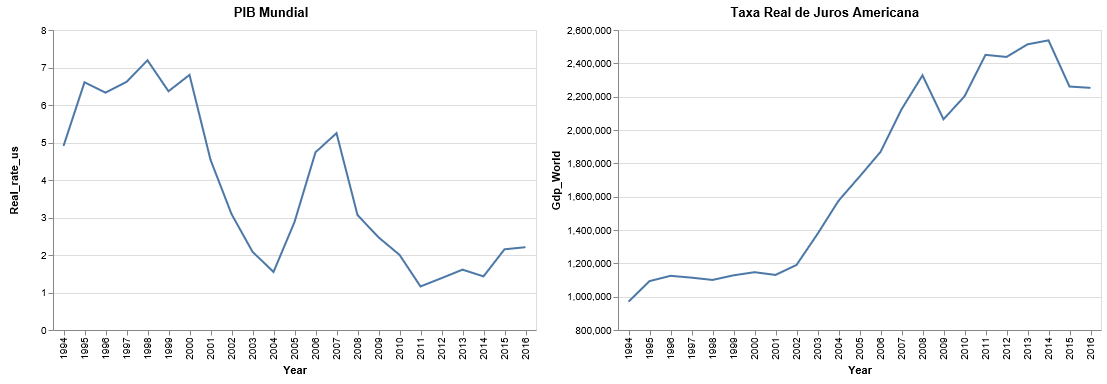

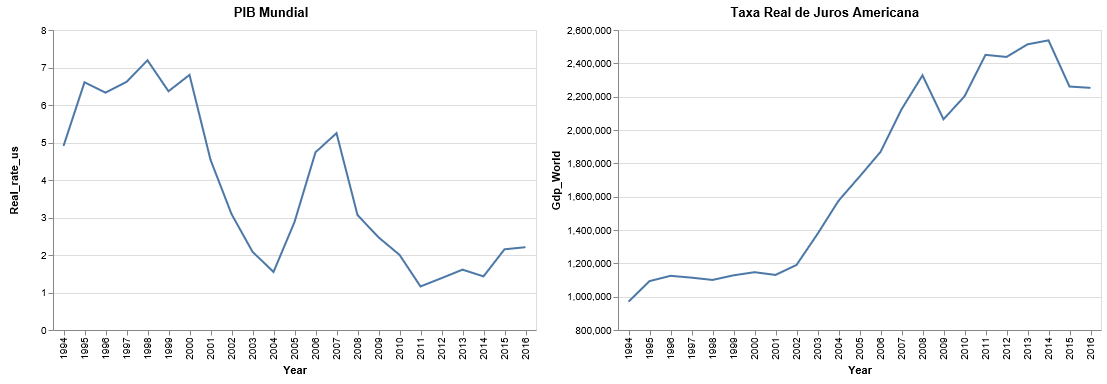

In [10]:
#Criando figura interativa no Altair:
merged=gdp_world.merge(real_rate)
alt.renderers.enable('notebook')
brush = alt.selection(type='interval', encodings=['x'])

real_rate_chart = alt.Chart(merged).mark_line().encode(
  x=alt.X('Year:N'),
  y=alt.Y('Real_rate_us:Q')
).properties(
  title='PIB Mundial'
).add_selection(
    brush
)


gdp_world_chart = alt.Chart(merged).mark_line().encode(
  x=alt.X('Year:N', scale=alt.Scale(zero=False)),
  y=alt.Y('Gdp_World:Q', scale=alt.Scale(zero=False)),
).properties(
  title='Taxa Real de Juros Americana'
).transform_filter(
  brush
)


real_rate_chart | gdp_world_chart


Análise: Utilizando o controle deslizante percebemos que para pequenos períodos de tempo a taxa real de juros Ameriana e o PIB Mundial possuem uma relação negativa. A explicação da teoria econômica é que a elevação da taxa real de juros americana atrai o capital estrangeiro, mas diminui o consumo e o investimento privado do país o levando para recessão. Contudo, os outros países do mundo elevam também a própria taxa de juros para evitar fuga de capitais. A recessão então é causada no mundo todo. 